# 6.6 Sourcing & Analyzing Time Series Data

This notebook contains the following:

#### [1. Library and Data Import](#1)
#### [2. Data Wrangling and Cleaning](#2)
#### [3. Time-series analysis: decomposition](#3)
#### [4. Testing for Stationarity](#4)
#### [5. Stationarizing Data](#5)

## 1. Library and Data Import <a class="anchor" id="1"></a>

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [3]:
path = r'C:\Users\chris\OneDrive\Desktop\Data Analytics CF\06_Advanced Analytics'

In [4]:
data = pd.read_excel(os.path.join(path, '6.6 Mitgliederzahlen DTB 1948-2021.xlsx'))

In [5]:
data.head()

,Jahr,Jugendliche,Erwachsene,Gesamt
0,1948-01-01,14306.0,57371.0,71677.0
1,1949-01-01,15204.0,58909.0,74113.0
2,1950-01-01,16503.0,51676.0,68179.0
3,1951-01-01,18765.0,60989.0,79754.0
4,1952-01-01,24297.0,68282.0,92579.0


In [6]:
data.shape

(74, 4)

In [7]:
data.columns

Index(['Jahr', 'Jugendliche', 'Erwachsene', 'Gesamt'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
# Setting the year as the index

from datetime import datetime

data['datetime'] = pd.to_datetime(data['Jahr'])
data = data.set_index('datetime')
data.drop(['Jahr'], axis =1, inplace = True)
data.head()

,Jugendliche,Erwachsene,Gesamt
datetime,,,
1948-01-01,14306.0,57371.0,71677.0
1949-01-01,15204.0,58909.0,74113.0
1950-01-01,16503.0,51676.0,68179.0
1951-01-01,18765.0,60989.0,79754.0
1952-01-01,24297.0,68282.0,92579.0


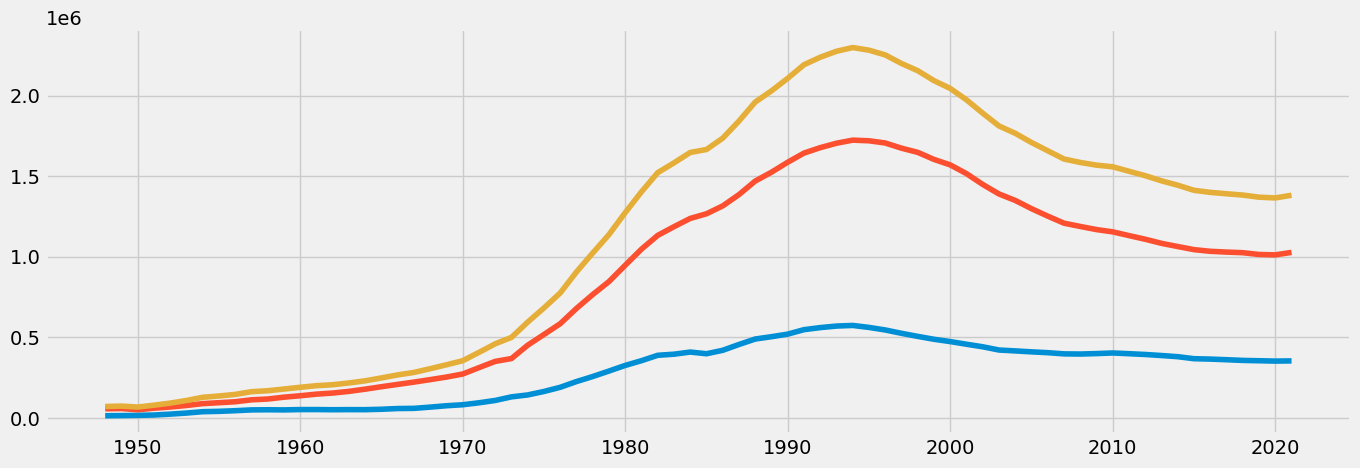

In [10]:
# Plotting the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100)

plt.plot(data)

## 2. Data Wrangling and Cleaning <a class="anchor" id="2"></a>

In [12]:
# Dropping the columns Jugendliche and Erwachsene to stay with one data column only
data.drop(['Jugendliche'], axis =1, inplace = True)
data.drop(['Erwachsene'], axis =1, inplace = True)

In [ ]:
# Checking for missing values

data.isnull().sum()

In [ ]:
# Duplicate check
dups = data.duplicated()
dups.sum()

## 3. Time-series analysis: decomposition <a class="anchor" id="3"></a>

In [13]:
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [14]:
# Fixing size for all special charts
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

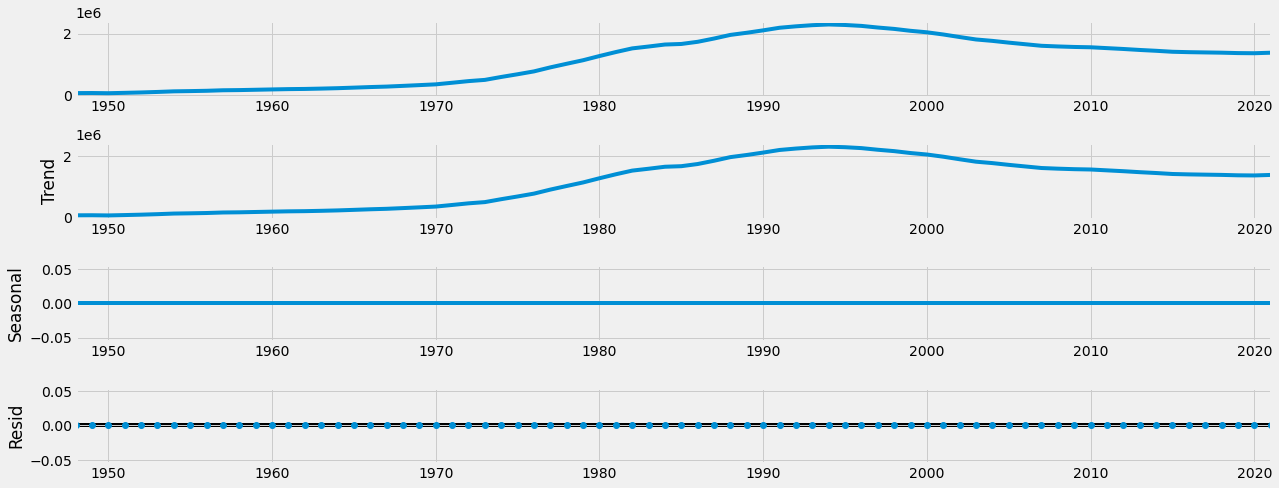

In [15]:
# Plotting the separate components

decomposition.plot()
plt.show()

The decomposition suggests that the data only contains a trend regarding the number of members.
There are no seasonal or residual effects.


## 4. Testing for Stationarity <a class="anchor" id="4"></a>

Null-hypothesis : Data is not stationary

In [16]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Gesamt'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.115496
p-value                         0.238329
Number of Lags Used             1.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


Test statistics is bigger than the critical values thus the hypothesis can't be rejected.
p-value above 0.05 -> not significant

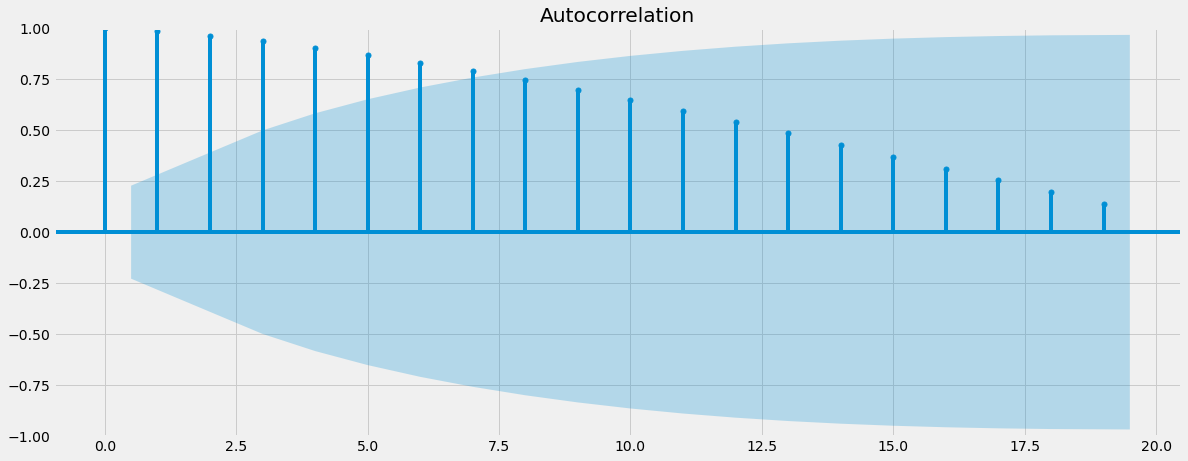

In [17]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data)
plt.show()

## 5. Stationarizing Data <a class="anchor" id="5"></a>

In [18]:
# Applying differencing to the data
data_diff = data - data.shift(1)

In [19]:
data_diff.dropna(inplace = True) 

In [20]:
data_diff.head()

,Gesamt
datetime,
1949-01-01,2436.0
1950-01-01,-5934.0
1951-01-01,11575.0
1952-01-01,12825.0
1953-01-01,16356.0


In [21]:
data_diff.columns

Index(['Gesamt'], dtype='object')

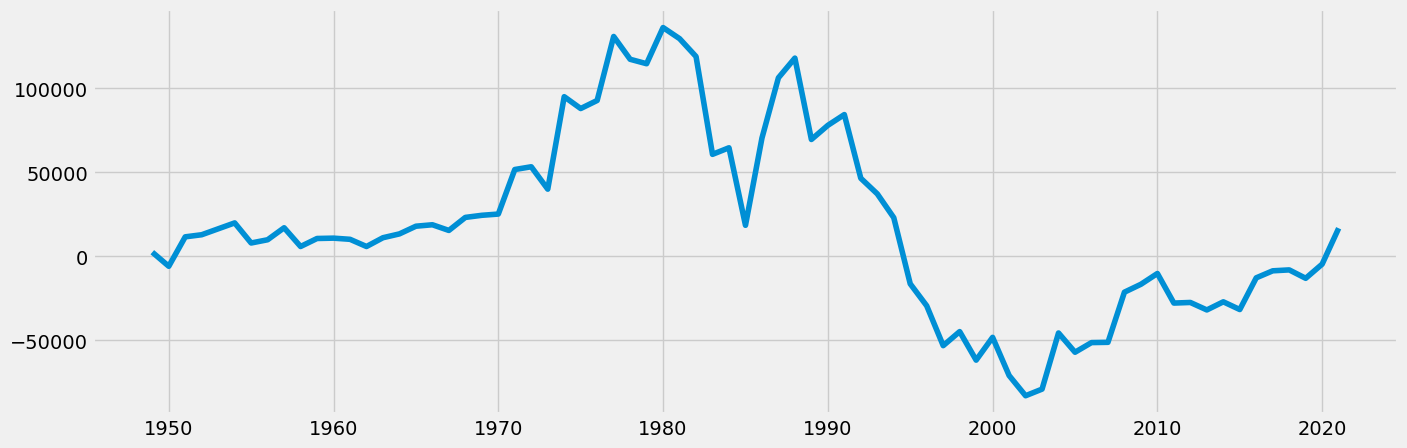

In [22]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### Retesting

In [23]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.551302
p-value                         0.507998
Number of Lags Used             0.000000
Number of Observations Used    72.000000
Critical Value (1%)            -3.524624
Critical Value (5%)            -2.902607
Critical Value (10%)           -2.588679
dtype: float64


Test statistics is still smaller bigger than critical values. <br>
p-value above 0.05 <br>
<br>
Another round of differencing will be performed.



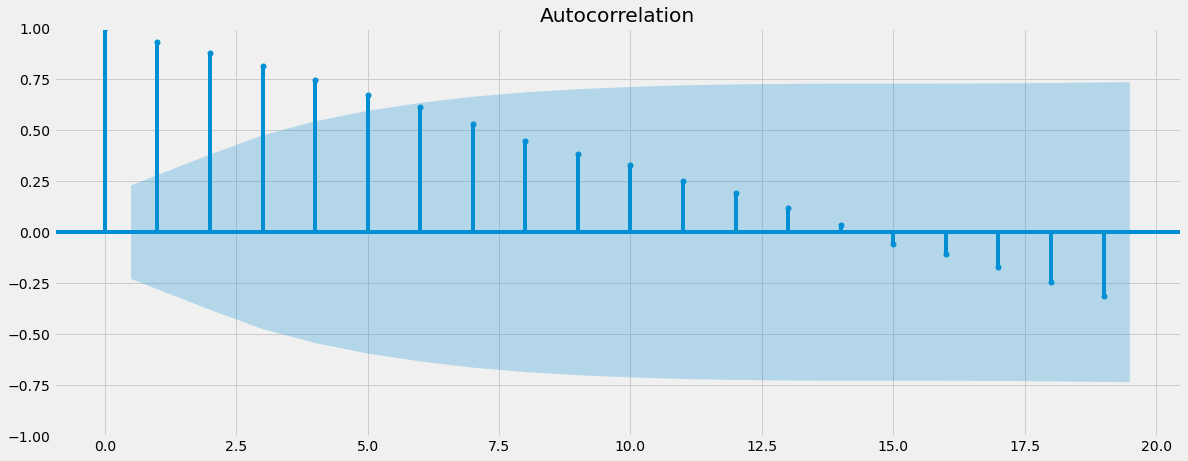

In [24]:
plot_acf(data_diff)
plt.show()

In [25]:
data_diff2 = data_diff - data_diff.shift(1)

In [26]:
data_diff2.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

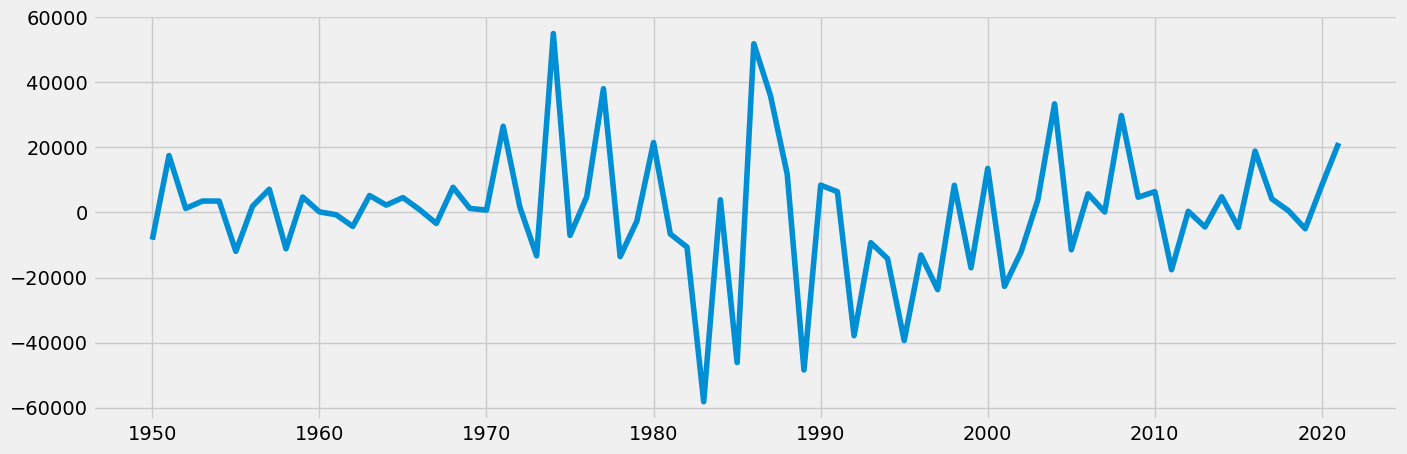

In [27]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

###  Second Retest

In [28]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -8.830490e+00
p-value                        1.775294e-14
Number of Lags Used            0.000000e+00
Number of Observations Used    7.100000e+01
Critical Value (1%)           -3.526005e+00
Critical Value (5%)           -2.903200e+00
Critical Value (10%)          -2.588995e+00
dtype: float64


Test statistics is smaller than critical values and p value is smaller than 0.05. <br>
Null-hypothesis can be rejected and data is now stationary.

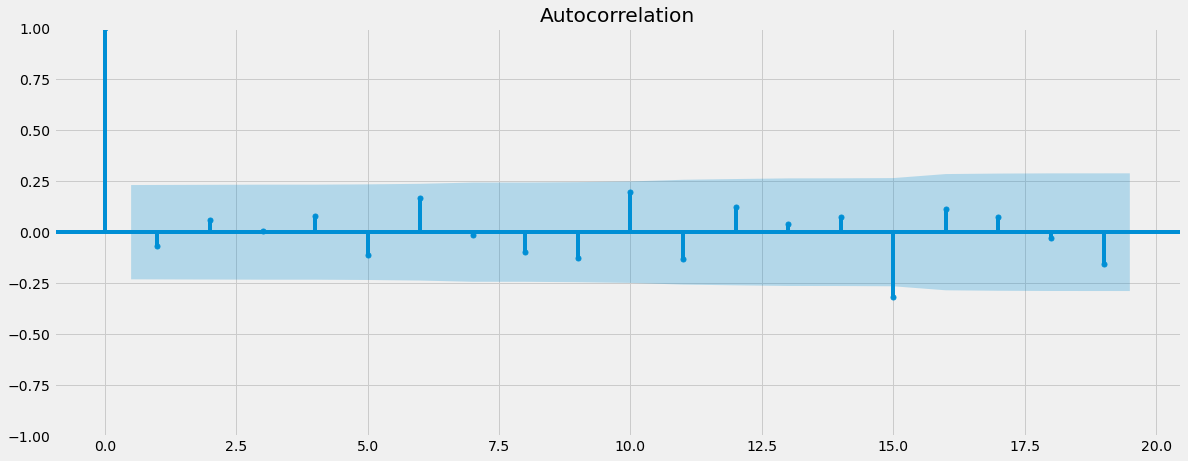

In [29]:
plot_acf(data_diff2)
plt.show()

Autocorrelation has been minimized to only 2 values (0 and 15)